In [77]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import sweetviz as sv
import dtale as dt
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [78]:
excel_file = 'Data\Riyadh_Aqqar.xlsx'
Villa = pd.read_excel(excel_file, sheet_name="Villas (الفلل)")  

In [79]:
Villa.shape

(1090, 20)

In [80]:
Villa.head()

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244.0,1,1,1,1,0,1,0,0,1,1,2300000
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322.0,1,1,1,1,1,1,0,0,1,1,3000000
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,NaN,350.0,1,0,1,0,1,0,0,1,1,1,2600000
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350.0,1,1,1,0,0,1,0,1,1,1,2600000
4,فيلا,الرياض,حي العارض,غربية,4,1,5+,NaN,270.0,1,1,1,1,0,0,0,0,1,0,2800000


In [81]:
Villa.isnull().sum().sort_values(ascending = False)

عرض الشارع        625
عدد الصالات       123
عدد الغرف          97
عدد الحمامات       97
الواجهة            31
المساحة            31
نوع العقار          0
ملحق                0
مصعد                0
مدخل سيارة          0
قبو                 0
مسبح                0
حوش                 0
مطبخ                0
غرفة سائق           0
غرفة خادمة          0
المدينة             0
درج صالة            0
الحي                0
السعر الاجمالي      0
dtype: int64

In [82]:
Villa.duplicated().sum()

136

In [83]:
new_villa_df = Villa.drop(columns="عرض الشارع")

new_villa_df

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,244.0,1,1,1,1,0,1,0,0,1,1,2300000
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,322.0,1,1,1,1,1,1,0,0,1,1,3000000
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,350.0,1,0,1,0,1,0,0,1,1,1,2600000
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,350.0,1,1,1,0,0,1,0,1,1,1,2600000
4,فيلا,الرياض,حي العارض,غربية,4,1,5+,270.0,1,1,1,1,0,0,0,0,1,0,2800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,فيلا,الرياض,حي الازدهار,جنوبية شرقية,7+,5,5+,720.0,1,1,1,1,1,1,0,1,1,0,3900000
1086,فيلا,امارة منطقة الرياض,الرياض,جنوبية,NaN,NaN,NaN,320.0,0,0,0,0,0,0,0,0,0,0,1550000
1087,فيلا,الرياض,حي النسيم الغربي,شرقية,4,1,3,450.0,0,0,0,0,0,1,0,0,1,0,1500000
1088,فيلا,الرياض,حي الاندلس,شرقية,5,1,5+,632.0,0,1,1,0,1,1,0,0,1,0,2400000


In [84]:
new_villa_df.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة            31
عدد الغرف          97
عدد الصالات       123
عدد الحمامات       97
المساحة            31
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [85]:
new_villa_df.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'درج صالة', 'مطبخ', 'غرفة خادمة',
       'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة', 'مصعد',
       'السعر الاجمالي'],
      dtype='object')

In [86]:
# Number of nulls value = 102 out of 

missing_values_df = new_villa_df[new_villa_df[['المساحة','عدد الحمامات','عدد الغرف','عدد الصالات', 'الواجهة']].isnull().any(axis=1)]
missing_values_df

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
69,فيلا,الرياض,حي الياسمين,جنوبية,5,NaN,2,375.0,1,0,1,1,0,0,0,0,0,0,4600000
175,فيلا,الدرعية,العيينة,ثلاث شوارع,7+,NaN,4,565.0,1,1,0,1,1,0,0,0,1,0,2000000
215,فيلا,الرياض,حي الملقا,شمالية,6,NaN,5+,360.0,0,1,0,0,0,0,0,0,0,0,4700000
280,فيلا,الرياض,حي الملك فيصل,شمالية شرقية,7+,NaN,1,875.0,1,0,0,0,0,0,0,0,0,0,4500000
283,فيلا,الرياض,حي النظيم,جنوبية,1,NaN,3,500.0,0,1,0,0,0,0,0,0,0,0,1550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,فيلا,الرياض,حي اليرموك,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,2250000
1074,فيلا,الرياض,حي الشرق,شمالية,NaN,NaN,NaN,281.0,0,0,0,0,0,0,0,0,0,0,1400000
1075,فيلا,الرياض,حي الملك عبد العزيز,شرقية,NaN,NaN,NaN,350.0,0,0,0,0,0,0,0,0,0,0,3000000
1081,فيلا,الرياض,حي اليرموك,شرقية,NaN,NaN,NaN,300.0,0,0,0,0,0,0,0,0,0,0,2250000


In [87]:
filtered_df = new_villa_df[~new_villa_df[['المساحة','عدد الحمامات','عدد الغرف','عدد الصالات', 'الواجهة']].isnull().any(axis=1)]

filtered_df

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,244.0,1,1,1,1,0,1,0,0,1,1,2300000
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,322.0,1,1,1,1,1,1,0,0,1,1,3000000
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,350.0,1,0,1,0,1,0,0,1,1,1,2600000
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,350.0,1,1,1,0,0,1,0,1,1,1,2600000
4,فيلا,الرياض,حي العارض,غربية,4,1,5+,270.0,1,1,1,1,0,0,0,0,1,0,2800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,فيلا,الرياض,حي النهضة,شرقية,5,3,4,360.0,0,1,1,1,1,1,0,0,1,0,2000000
1085,فيلا,الرياض,حي الازدهار,جنوبية شرقية,7+,5,5+,720.0,1,1,1,1,1,1,0,1,1,0,3900000
1087,فيلا,الرياض,حي النسيم الغربي,شرقية,4,1,3,450.0,0,0,0,0,0,1,0,0,1,0,1500000
1088,فيلا,الرياض,حي الاندلس,شرقية,5,1,5+,632.0,0,1,1,0,1,1,0,0,1,0,2400000


In [88]:
filtered_df.isnull().sum()

نوع العقار        0
المدينة           0
الحي              0
الواجهة           0
عدد الغرف         0
عدد الصالات       0
عدد الحمامات      0
المساحة           0
درج صالة          0
مطبخ              0
غرفة خادمة        0
غرفة سائق         0
ملحق              0
حوش               0
مسبح              0
قبو               0
مدخل سيارة        0
مصعد              0
السعر الاجمالي    0
dtype: int64

In [89]:
filtered_df.shape

(967, 19)

In [90]:
# To display the total duplicate values
filtered_df.duplicated().sum()

119

In [91]:
# To drop duplicates values.

filtered_df = filtered_df.drop_duplicates()

In [92]:
filtered_df.duplicated().sum()

0

In [93]:
filtered_df.shape

(848, 19)

In [94]:
filtered_df.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف          object
عدد الصالات        object
عدد الحمامات       object
المساحة           float64
درج صالة            int64
مطبخ                int64
غرفة خادمة          int64
غرفة سائق           int64
ملحق                int64
حوش                 int64
مسبح                int64
قبو                 int64
مدخل سيارة          int64
مصعد                int64
السعر الاجمالي      int64
dtype: object

In [95]:
filtered_df['المساحة'] = filtered_df['المساحة'].astype(np.int64)

C:\Users\alsau\AppData\Local\Temp\ipykernel_49452\999512454.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
filtered_df.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'درج صالة', 'مطبخ', 'غرفة خادمة',
       'غرفة سائق', 'ملحق', 'حوش', 'مسبح', 'قبو', 'مدخل سيارة', 'مصعد',
       'السعر الاجمالي'],
      dtype='object')

In [97]:
# Change the data types from int64 to boolean

cols_to_boolean = ['مصعد','مدخل سيارة','قبو','مسبح','حوش','ملحق','غرفة سائق','درج صالة', 'مطبخ','غرفة خادمة']  
filtered_df[cols_to_boolean] = filtered_df[cols_to_boolean].applymap(lambda x: bool(x))

C:\Users\alsau\AppData\Local\Temp\ipykernel_49452\1421806703.py:4: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\alsau\AppData\Local\Temp\ipykernel_49452\1421806703.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
filtered_df.dtypes

نوع العقار        object
المدينة           object
الحي              object
الواجهة           object
عدد الغرف         object
عدد الصالات       object
عدد الحمامات      object
المساحة            int64
درج صالة            bool
مطبخ                bool
غرفة خادمة          bool
غرفة سائق           bool
ملحق                bool
حوش                 bool
مسبح                bool
قبو                 bool
مدخل سيارة          bool
مصعد                bool
السعر الاجمالي     int64
dtype: object

In [99]:
filtered_df.head(10)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,244,True,True,True,True,False,True,False,False,True,True,2300000
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,322,True,True,True,True,True,True,False,False,True,True,3000000
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,350,True,False,True,False,True,False,False,True,True,True,2600000
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,350,True,True,True,False,False,True,False,True,True,True,2600000
4,فيلا,الرياض,حي العارض,غربية,4,1,5+,270,True,True,True,True,False,False,False,False,True,False,2800000
5,فيلا,الرياض,حي النرجس,شمالية,7+,4,5+,360,True,True,True,True,True,True,False,False,True,False,3500000
6,فيلا,الرياض,حي الملقا,شرقية,3,3,3,437,False,True,True,True,False,False,False,False,True,False,4500000
7,فيلا,الرياض,حي الملقا,شمالية,5,1,5+,252,True,True,True,True,False,False,False,False,True,True,2800000
8,فيلا,الرياض,حي النخيل,شمالية غربية,6,3,5+,1200,True,True,True,True,True,True,True,True,True,True,17000000
9,فيلا,الرياض,حي الملقا,شرقية,4,3,5+,270,True,True,True,True,False,True,False,False,True,True,3600000


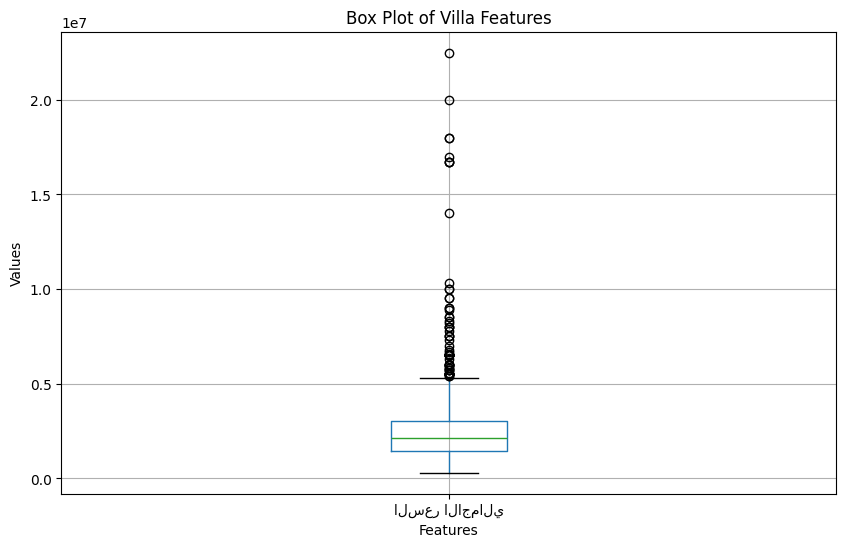

In [100]:
columns_to_plot = ['السعر الاجمالي']

# Create a box plot for each column
filtered_df[columns_to_plot].boxplot(figsize=(10, 6))

# Customize the plot
plt.title('Box Plot of Villa Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()

In [101]:
column_rename_dict = {

    'الواجهة': 'front',
    'عدد الغرف': 'rooms',
    'مطبخ': 'kitchen',
    'مسبح': 'pool',
    'عدد الحمامات': 'bathrooms',
    'عدد الصالات': 'lounges',
    'المدينة': 'city',
    'الحي': 'neighbourhood',
    'نوع العقار': 'property type',
    'المساحة': 'space',
    'درج صالة': 'stairs',
    'غرفة خادمة': 'maidRoom',
    'غرفة سائق': 'driverRoom',
    'ملحق': 'outdoorRoom',
    'حوش': 'patio',
    'قبو': 'basement',
    'مدخل سيارة': 'garage',
    'مصعد': 'elevator',
    'السعر الاجمالي': 'price',

    
}

# Rename multiple columns
filtered_df.rename(columns=column_rename_dict, inplace=True)

C:\Users\alsau\AppData\Local\Temp\ipykernel_49452\933869847.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
filtered_df.columns


Index(['property type', 'city', 'neighbourhood', 'front', 'rooms', 'lounges',
       'bathrooms', 'space', 'stairs', 'kitchen', 'maidRoom', 'driverRoom',
       'outdoorRoom', 'patio', 'pool', 'basement', 'garage', 'elevator',
       'price'],
      dtype='object')

In [103]:
dt.show(filtered_df)

In [104]:
filtered_df.columns


Index(['property type', 'city', 'neighbourhood', 'front', 'rooms', 'lounges',
       'bathrooms', 'space', 'stairs', 'kitchen', 'maidRoom', 'driverRoom',
       'outdoorRoom', 'patio', 'pool', 'basement', 'garage', 'elevator',
       'price'],
      dtype='object')

In [105]:

cleaned_riyadh_villa = pd.read_csv("Data\cleaned_riyadh_villa.csv")

In [106]:
cleaned_riyadh_villa.columns

Index(['Unnamed: 0', 'front', 'rooms', 'lounges', 'bathrooms', 'stairs',
       'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom', 'garage',
       'duplex', 'space', 'maidRoom', 'elevator', 'pool', 'basement',
       'neighbourhood', 'location', 'price', 'square price'],
      dtype='object')

In [107]:
filtered_df.head(10)

,property type,city,neighbourhood,front,rooms,lounges,bathrooms,space,stairs,kitchen,maidRoom,driverRoom,outdoorRoom,patio,pool,basement,garage,elevator,price
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,244,True,True,True,True,False,True,False,False,True,True,2300000
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,322,True,True,True,True,True,True,False,False,True,True,3000000
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,350,True,False,True,False,True,False,False,True,True,True,2600000
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,350,True,True,True,False,False,True,False,True,True,True,2600000
4,فيلا,الرياض,حي العارض,غربية,4,1,5+,270,True,True,True,True,False,False,False,False,True,False,2800000
5,فيلا,الرياض,حي النرجس,شمالية,7+,4,5+,360,True,True,True,True,True,True,False,False,True,False,3500000
6,فيلا,الرياض,حي الملقا,شرقية,3,3,3,437,False,True,True,True,False,False,False,False,True,False,4500000
7,فيلا,الرياض,حي الملقا,شمالية,5,1,5+,252,True,True,True,True,False,False,False,False,True,True,2800000
8,فيلا,الرياض,حي النخيل,شمالية غربية,6,3,5+,1200,True,True,True,True,True,True,True,True,True,True,17000000
9,فيلا,الرياض,حي الملقا,شرقية,4,3,5+,270,True,True,True,True,False,True,False,False,True,True,3600000


In [108]:
cleaned_riyadh_villa.head(10)

,Unnamed: 0,front,rooms,lounges,bathrooms,stairs,driverRoom,tent,patio,kitchen,...,duplex,space,maidRoom,elevator,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4,5,True,True,True,True,True,...,True,300,False,False,False,False,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3,5,True,True,True,True,True,...,False,540,True,True,False,False,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2,5,True,True,False,True,True,...,False,875,True,False,False,False,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3,5,True,False,True,True,True,...,True,200,True,False,False,False,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2,4,True,True,True,True,True,...,False,400,True,True,False,False,قرطبة,شرق الرياض,3500000.0,8750.000000
5,5,شمالية شرقية,7,2,5,True,False,True,True,True,...,False,500,False,False,False,False,السويدي,غرب الرياض,800000.0,1600.000000
6,6,شمالية,6,2,5,True,False,True,True,True,...,True,275,False,True,False,False,المهدية,غرب الرياض,2100000.0,7636.363636
7,7,شمالية,7,3,5,True,False,True,True,True,...,True,300,True,False,False,False,عكاظ,جنوب الرياض,1100000.0,3666.666667
8,8,جنوبية,5,2,4,False,False,False,True,True,...,False,585,False,False,False,False,الروضة,شرق الرياض,1900000.0,3247.863248
9,9,شمالية شرقية,5,5,5,True,False,False,True,True,...,False,360,True,False,False,False,عكاظ,جنوب الرياض,1200000.0,3333.333333
